In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import norm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show

In [3]:
mean = 7
scale = 45
gennorm = norm.rvs(loc=mean, scale= scale, size= 10000)

In [4]:
def stdnm(inputnum, mean, scale):
    return (inputnum-mean)/scale

In [5]:
gennormstd = np.array([stdnm(i, mean, scale) for i in gennorm])

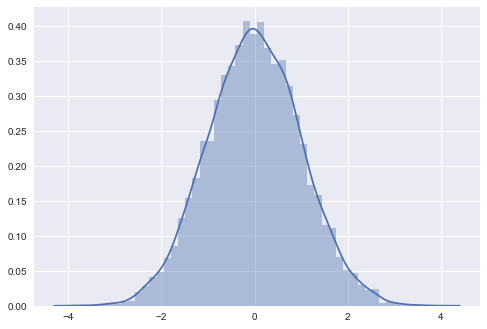

In [6]:
sns.distplot(gennormstd)
show()

In [7]:
def computeZscore(mu, xbar, sig, N):
    return (xbar-mu)*(N)**.5/(sig)

In [8]:
zscore = computeZscore(1.2, 1.05, 0.5, 100)

In [9]:
2*norm.sf(abs(zscore))

0.0026997960632602026

In [10]:
x = np.array([177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5])

In [11]:
def computetscore(x, mu):
    test = np.array([(i-x.mean())**2 for i in x]).sum()/9
    return (x.mean()-mu)/(test**.5/(len(x)**.5))

In [12]:
computetscore(x,175.3)

2.295568968083183

In [13]:
sp.stats.ttest_1samp(x, 175.3)

Ttest_1sampResult(statistic=2.295568968083183, pvalue=0.04734137339747034)

In [14]:
test = np.array([(i-x.mean())**2 for i in x]).sum()/9
test**.5

3.6643022679783286

In [15]:
np.array(x).std(ddof=1)

3.6643022679783286

In [16]:
test**.5

3.6643022679783286

In [17]:
test1 = np.array([(i-x.mean())**2 for i in x]).sum()/10
test1

12.084400000000011

In [18]:
test1**.5

3.4762623606396583

In [40]:
def z_or_t(data_sample, mu, sigma, significant_level):
    N = len(data_sample)
    if sigma or N>30:
        z_score = (N.mean()-mu)*(len(N))**.5/(sigma)
        p_value = 2*norm.sf(abs(z_score))
        return "Accept H_0 (by Z-test)" if p_value > z_score else "Reject H_0 (by Z-test)"
    else:
        t_score, p_value = sp.stats.ttest_1samp(data_sample, mu)
        print(t_score, p_value)
        return "Accept H_0 (by t-test)" if p_value > t_score else "Reject H_0 (by t-test)"

In [41]:
z_or_t(x, 175.3, False, 0.05)

2.295568968083183 0.04734137339747034


'Reject H_0 (by t-test)'